In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files


# Upload the file
uploaded = files.upload()

# Load the uploaded CSV file
X_data = pd.read_csv('vectorized_graphs3.csv')  # Replace with your actual filename
print(X_data.head())


Saving vectorized_graphs3.csv to vectorized_graphs3.csv
   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       3       3       3       3       3       0       0       0       3   
1       3       3       3       3       0       0       0       0       3   
2       3       3       3       1       0       0       0       0       3   
3       2       2       2       2       0       0       0       0       2   
4       5       3       3       1       0       0       0       0       3   

   Edge_10  ...  Edge_27  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  \
0        3  ...        3        0        0        0        0        0   
1        3  ...        1        0        0        0        3        0   
2        3  ...        1        1        0        0        0        0   
3        2  ...        2        0        0        0        0        0   
4        3  ...        1        1        0        0        5        0   

   Edge_33  Edge_34  Edge_35  Edge_36  
0 

In [ ]:
# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
Y_data = pd.read_csv('rigidity_results.csv')  
print(Y_data.head())

Saving rigidity_results.csv to rigidity_results.csv
   Is_Rigid
0         1
1         1
2         0
3         1
4         0


In [4]:
# Concatenate the two DataFrames
dataset = pd.concat([X_data, Y_data], axis=1)
print(dataset.head())


   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       3       3       3       3       3       0       0       0       3   
1       3       3       3       3       0       0       0       0       3   
2       3       3       3       1       0       0       0       0       3   
3       2       2       2       2       0       0       0       0       2   
4       5       3       3       1       0       0       0       0       3   

   Edge_10  ...  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  Edge_33  \
0        3  ...        0        0        0        0        0        0   
1        3  ...        0        0        0        3        0        0   
2        3  ...        1        0        0        0        0        0   
3        2  ...        0        0        0        0        0        0   
4        3  ...        1        0        0        5        0        0   

   Edge_34  Edge_35  Edge_36  Is_Rigid  
0        0        0        0         1  
1        0      

In [5]:
# Normalize all columns except the last one to the range [0, 1]
for column in dataset.columns[:-1]:  # Loop through all columns except the last
    min_val = dataset[column].min()
    max_val = dataset[column].max()

    # Check if min and max are the same
    if min_val == max_val:
        dataset[column] = 0
    else:
        # Apply min-max normalization
        dataset[column] = (dataset[column] - min_val) / (max_val - min_val)

# Replace any remaining NaN values with 0
dataset = dataset.fillna(0)

# View the first few rows of the normalized data
print(dataset.head())


   Edge_1    Edge_2    Edge_3    Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  \
0     0.3  0.500000  0.500000  0.500000     0.5     0.0     0.0     0.0   
1     0.3  0.500000  0.500000  0.500000     0.0     0.0     0.0     0.0   
2     0.3  0.500000  0.500000  0.166667     0.0     0.0     0.0     0.0   
3     0.2  0.333333  0.333333  0.333333     0.0     0.0     0.0     0.0   
4     0.5  0.500000  0.500000  0.166667     0.0     0.0     0.0     0.0   

   Edge_9   Edge_10  ...   Edge_28  Edge_29  Edge_30   Edge_31  Edge_32  \
0     0.3  0.500000  ...  0.000000      0.0      0.0  0.000000      0.0   
1     0.3  0.500000  ...  0.000000      0.0      0.0  0.333333      0.0   
2     0.3  0.500000  ...  0.142857      0.0      0.0  0.000000      0.0   
3     0.2  0.333333  ...  0.000000      0.0      0.0  0.000000      0.0   
4     0.3  0.500000  ...  0.142857      0.0      0.0  0.555556      0.0   

   Edge_33   Edge_34  Edge_35  Edge_36  Is_Rigid  
0      0.0  0.000000      0.0      0.0         

In [6]:
from sklearn.model_selection import train_test_split

# Split the combined dataset into training and testing sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


In [7]:
# Separate input (features) and output (target) for the training set
input_training = train_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_training = train_set['Is_Rigid'].to_numpy()

# Separate input (features) and output (target) for the testing set
input_test = test_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_test = test_set['Is_Rigid'].to_numpy()


In [8]:
# builiding model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(32, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [9]:
# compile model
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [13]:
history = model.fit(input_training,
 output_training,
 epochs=30,
 batch_size=1000,
 validation_data=(input_test, output_test))


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8976 - loss: 0.2486 - val_accuracy: 0.8785 - val_loss: 0.2853
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9008 - loss: 0.2460 - val_accuracy: 0.8664 - val_loss: 0.3070
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8964 - loss: 0.2485 - val_accuracy: 0.8785 - val_loss: 0.2835
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8993 - loss: 0.2456 - val_accuracy: 0.8815 - val_loss: 0.2802
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9029 - loss: 0.2402 - val_accuracy: 0.8822 - val_loss: 0.2795
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9059 - loss: 0.2371 - val_accuracy: 0.8810 - val_loss: 0.2805
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9045 - loss: 0.2393 - val_accuracy: 0.8687 - val_loss: 0.3024
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9010 - loss: 0.2427 - val_accuracy: 0.8799 - val_loss:

In [14]:
results = model.evaluate(input_test, output_test)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8859 - loss: 0.2655


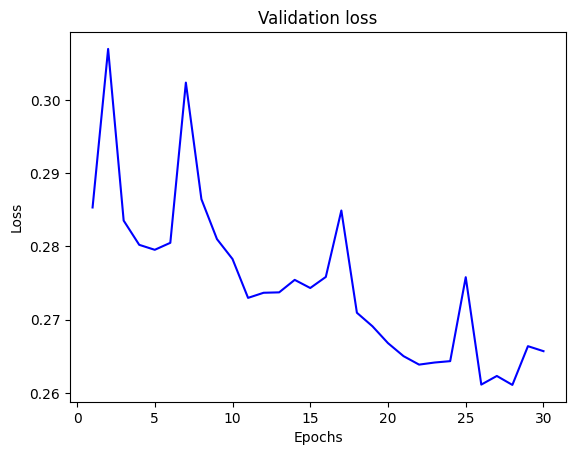

In [15]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, len(val_loss) + 1)
plt.title("Validation loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()